In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base = "CME"

In [3]:
if base == "CME":
    sec = "Dino"
if base == "Dino":
    sec = "CME"

Coverage = pd.read_csv(f"{base} Base Output/ID_Coverage.csv")
Comparison = pd.read_csv(f"{base} Base Output/Comparison.csv")
    
df = Coverage.copy()
df = df[[f"ID ({base})", "Missing Time Points"]]
df["Missing Time Points"] = df["Missing Time Points"].apply(
    lambda x: [int(float(i.strip())) for i in x.strip('[]').split(',') if i.strip()] if isinstance(x, str) else ([int(float(x))] if not pd.isnull(x) else []))
df = df.explode("Missing Time Points")
merged = pd.merge(df, Comparison, left_on=[f"ID ({base})", "Missing Time Points"], right_on=[f"ID ({base})", "t"], how="inner")

merged.to_csv(f"{base} Base Output/ComparisonMissingTimePoints.csv", index = False)

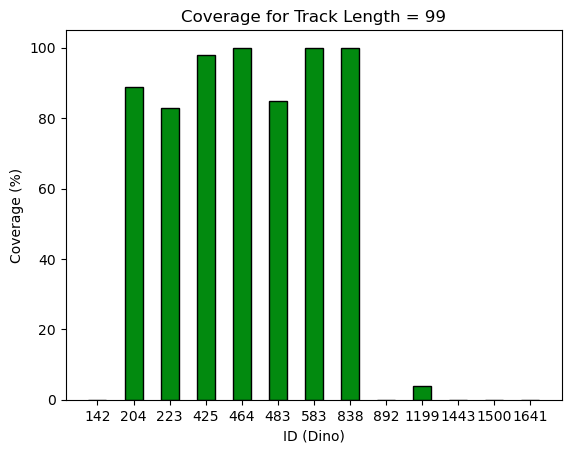

<Figure size 640x480 with 0 Axes>

In [4]:
TL = 99

Coverage_TL = Coverage[Coverage[f"Track Length ({base})"]==TL]
cov = Coverage_TL.to_numpy()
plt.bar(cov[:,0].astype(int).astype(str), 100*(cov[:,2]/cov[:,1]), width = 0.5, edgecolor = "black", color="#028A0F")
plt.xlabel(f"ID ({base})")
plt.ylabel("Coverage (%)")
plt.title(f"Coverage for Track Length = {TL}")
plt.show()
plt.savefig(f"{base} Base Plots/Coverage TL {TL}.png")

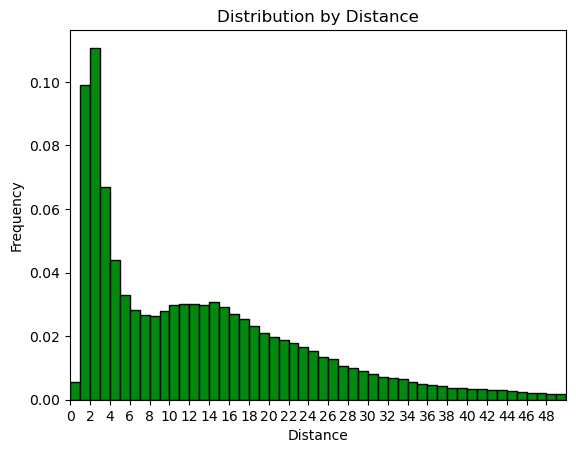

<Figure size 640x480 with 0 Axes>

In [5]:
bins = np.arange(0, Comparison["Distance"].max() + 2, 1)
plt.hist(Comparison["Distance"], bins = bins, density=True, edgecolor = "black", color="#028A0F")
plt.xlim(0,50)
plt.xticks(np.arange(0, 50, 2))
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.title("Distribution by Distance")
plt.show()
plt.savefig(f"{base} Base Plots/Histogram Distance.png")

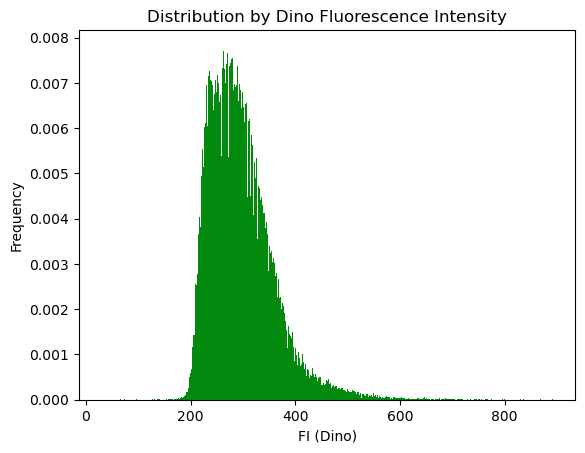

<Figure size 640x480 with 0 Axes>

In [6]:
plt.hist(Comparison[f"FI ({base})"], bins = round(max(Comparison[f"FI ({base})"])), density=True, color="#028A0F")
plt.xlabel(f"FI ({base})")
plt.ylabel("Frequency")
plt.title(f"Distribution by {base} Fluorescence Intensity")
plt.show()
plt.savefig(f"{base} Base Plots/Histogram FI.png")

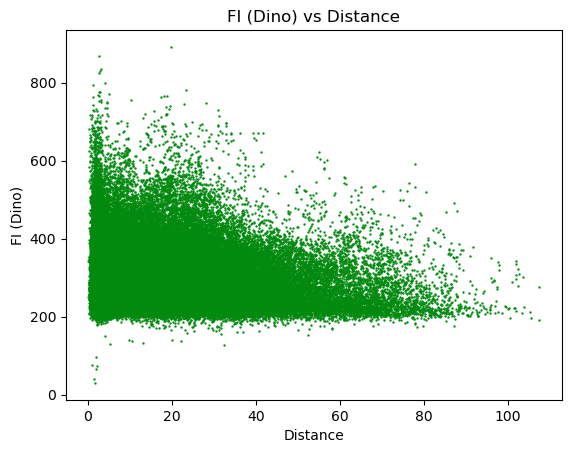

<Figure size 640x480 with 0 Axes>

In [7]:
plt.scatter(Comparison["Distance"], Comparison[f"FI ({base})"], s = 0.5, color="#028A0F")
plt.xlabel("Distance")
plt.ylabel(f"FI ({base})")
plt.title(f"FI ({base}) vs Distance")
plt.show()
plt.savefig(f"{base} Base Plots/FI vs Distance.png")

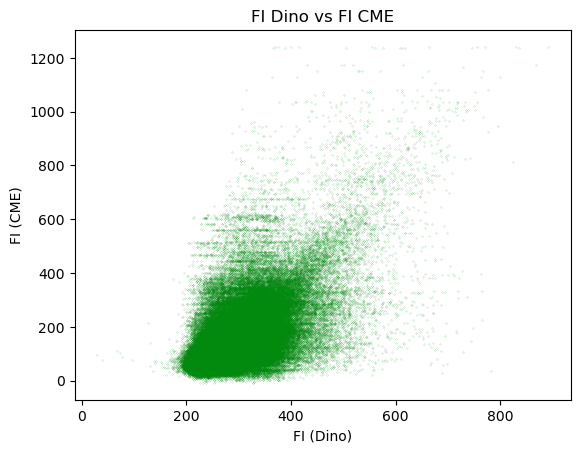

<Figure size 640x480 with 0 Axes>

In [8]:
plt.scatter(Comparison[f"FI ({base})"], Comparison[f"FI ({sec})"], s = 0.01, color="#028A0F")
plt.xlabel(f"FI ({base})")
plt.ylabel(f"FI ({sec})")
plt.title(f"FI {base} vs FI {sec}")
plt.show()
plt.savefig(f"{base} Base Plots/FI {base} vs FI {sec}.png")

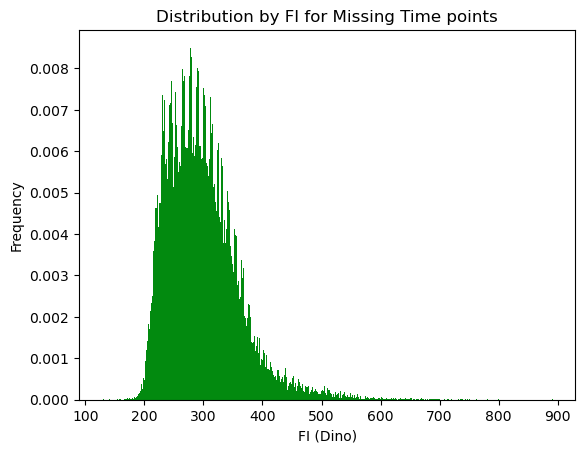

<Figure size 640x480 with 0 Axes>

In [9]:
plt.hist(merged[f"FI ({base})"], bins = round(max(merged[f"FI ({base})"])), density=True, color="#028A0F")
plt.xlabel(f"FI ({base})")
plt.ylabel("Frequency")
plt.title("Distribution by FI for Missing Time points")
plt.show()
plt.savefig(f"{base} Base Plots/Histogram missing t FI CME.png")

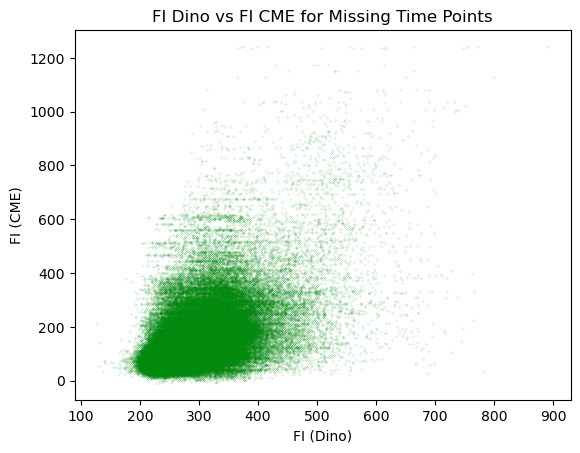

<Figure size 640x480 with 0 Axes>

In [10]:
plt.scatter(merged[f"FI ({base})"], merged[f"FI ({sec})"], s = 0.01, color="#028A0F")
plt.xlabel(f"FI ({base})")
plt.ylabel(f"FI ({sec})")
plt.title(f"FI {base} vs FI {sec} for Missing Time Points")
plt.show()
plt.savefig(f"{base} Base Plots/FI {base} vs FI {sec} missing t.png")

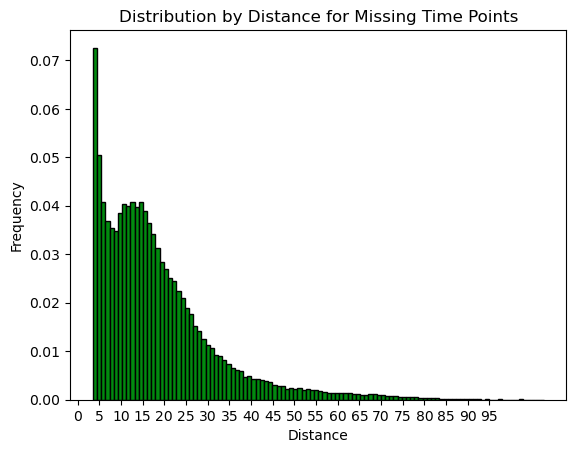

<Figure size 640x480 with 0 Axes>

In [11]:
bins = np.arange(0, merged["Distance"].max() + 2, 1)
plt.hist(merged["Distance"], bins = round(max(merged["Distance"])), density=True, edgecolor="black", color="#028A0F")
plt.xticks(np.arange(0, 100, 5))
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.title("Distribution by Distance for Missing Time Points")
plt.show()
plt.savefig(f"{base} Base Plots/Histogram Distance missing t.png")